In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv("MIP_data.csv", sep = ";")#, header=0, index_col = 0, usecols = "B:Q", nrows = 104)
df.drop(df.columns[df.columns.str.contains('Unnamed')],axis = 1, inplace = True)
df['Year (first published)'] = df['Year (first published)'].apply(lambda x: int(x) if len(str(x)) == 6 else pd.NA)
df

,Abbrv.,Projects,Tag,Phases,Author/Initiator,Objective,Overview Paper,Year (first published),Journal,Journal Impact Factor,# citations on Google Scholar,# embedded models,CMIP endorsed,ongoing
0,AerChemMIP,Aerosols and Chemistry Model Intercomparison P...,Aerosols,1,"William Collins, Michael Schulz, Vaishali Naik",climate and air quality impacts of aerosols a...,"Collins, W. J., Lamarque, J.-F., Schulz, M., B...",2017,Geoscientific Model Development,5.1,210.0,46.0,True,True
1,AOMIP,Arctic Ocean Model Intercomparison Project (AO...,Ocean/Land/Ice,0,"David Holland, Andrey Proshutinsky","impacts of sea-ice changes on climate, identif...","Steele, M. et al. (2001): Adrift in the Beaufo...",2001,Geophysical Research Letters,5.2,57.0,6.0,False,False
2,AOMIP,Arctic Ocean Model Intercomparison Project (AO...,Ocean/Land/Ice,1,"David Holland, Andrey Proshutinsky","1999–2007, identification and attribution of e...","Proshutinsky, A., et al. (2001), Multinational...",2001,"Eos (formerly Eos, Transactions, American Geop...",NaN,62.0,8.0,False,False
3,AOMIP,Arctic Ocean Model Intercomparison Project (AO...,Ocean/Land/Ice,2,"David Holland, Andrey Proshutinsky","successor: FAMOS, 2008–2012","Johnson, M., et al. (2012), Evaluation of Arct...",2012,Journal of Geophysical Research: Oceans,3.6,88.0,6.0,False,False
4,ARCMIP,Arctic Regional Climate Model Intercomparison ...,Regional Climate,1,"Judith Curry, WCRP GEWEX Cloud System Studies ...",assess differences in arctic climate predictio...,"Curry, J. A., and Lynch, A. H. (2002), Compari...",2002,"Eos (formerly Eos, Transactions, American Geop...",NaN,74.0,6.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,T-AMIP,Transpose-Atmospheric Model Intercomparison Pr...,Atmosphere,2,Keith Williams,global analysis,"Williams, K. D. et al. (2013). The Transpose-A...",2013,Journal of Climate,4.9,183.0,5.0,False,maybe
102,VolMIP,Volcanic Forcings Model Intercomparison Projec...,Forcing,1,"Davide Zanchettin, Claudia Timmreck, Myriam Kh...",large uncertainties regarding the climatic res...,"Zanchettin, D. et al.: The Model Intercomparis...",2016,Geoscientific Model Development,5.1,154.0,11.0,True,True
103,VIACSAB,"Vulnerability, Impacts, Adaptation and Climate...",Impacts,1,"Claas Teichmann, Alex Ruane",bridge between climate change applications exp...,"Ruane, A. C. et al.: The Vulnerability, Impact...",2016,Geoscientific Model Development,5.1,34.0,14.0,True,True
104,Radon,WCRP Radon Intercomparison,Aerosols,1,Daniel Jacob,evaluation of short-lived tracer transport (es...,"Jacob, D. J., et al. (1997), Evaluation and in...",1997,Journal of Geophysical Research: Atmospheres,4.4,316.0,20.0,False,False


<Axes: >

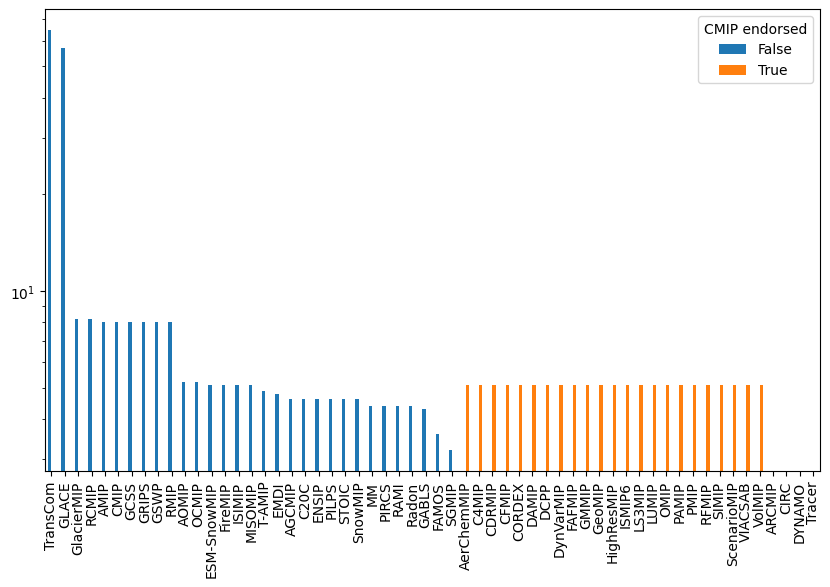

In [24]:
df.sort_values('Journal Impact Factor', ascending = False).drop_duplicates(['Abbrv.'])[['Abbrv.', 'Journal Impact Factor', 'CMIP endorsed']].set_index('Abbrv.').pivot(columns = 'CMIP endorsed', values = 'Journal Impact Factor').sort_values([False, True], ascending = False).plot(kind = 'bar', stacked = False, figsize = (10,6), logy = True, xlabel = '')

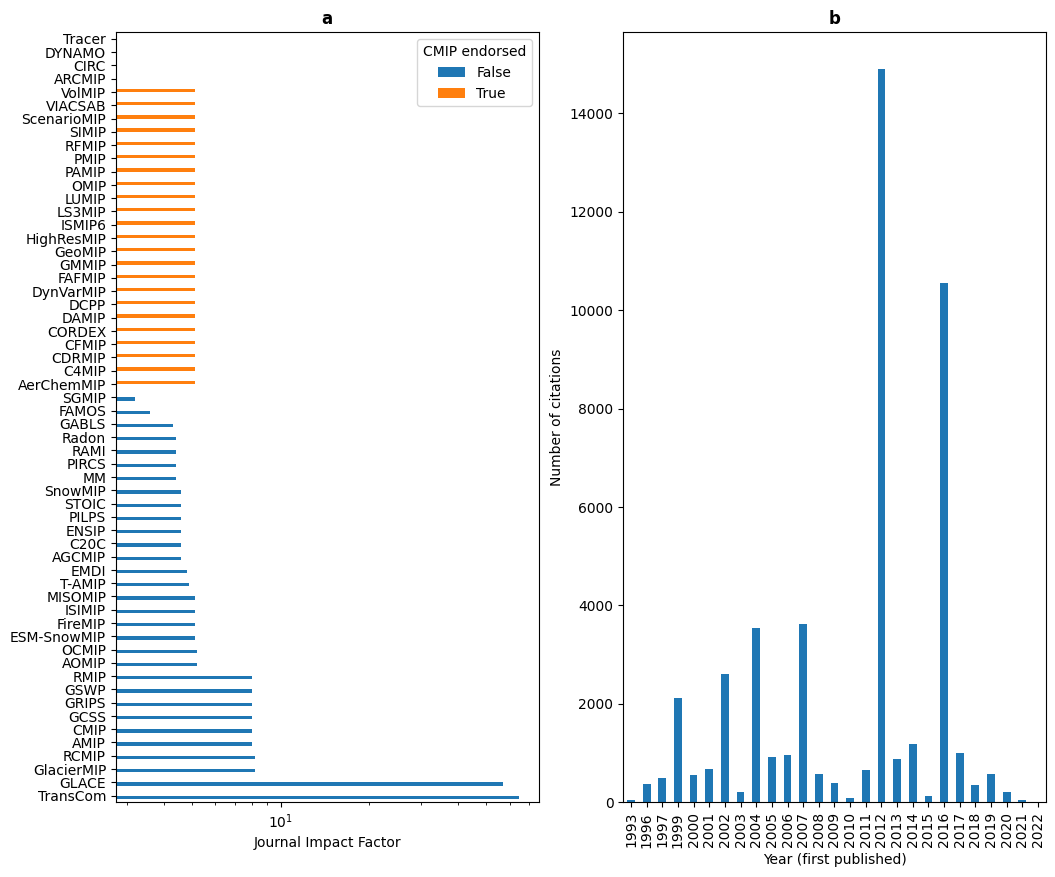

<Figure size 640x480 with 0 Axes>

In [59]:
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(nrows=1, ncols=2, hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

df.sort_values('Journal Impact Factor', ascending = False).drop_duplicates(['Abbrv.'])[['Abbrv.', 'Journal Impact Factor', 'CMIP endorsed']].set_index('Abbrv.')\
    .pivot(columns = 'CMIP endorsed', values = 'Journal Impact Factor').sort_values([False, True], ascending = False).plot(kind = 'barh', stacked = False, title = r'$\bf{a}$', xlabel = 'Journal Impact Factor', logx = True, ylabel = '', ax = ax1)
df[['Year (first published)', '# citations on Google Scholar']].groupby('Year (first published)').sum().plot(kind = 'bar', legend = False, title = r'$\bf{b}$', ylabel = 'Number of citations', ax = ax2)
plt.show()
plt.savefig('MIP_metrics.png', format = 'png')

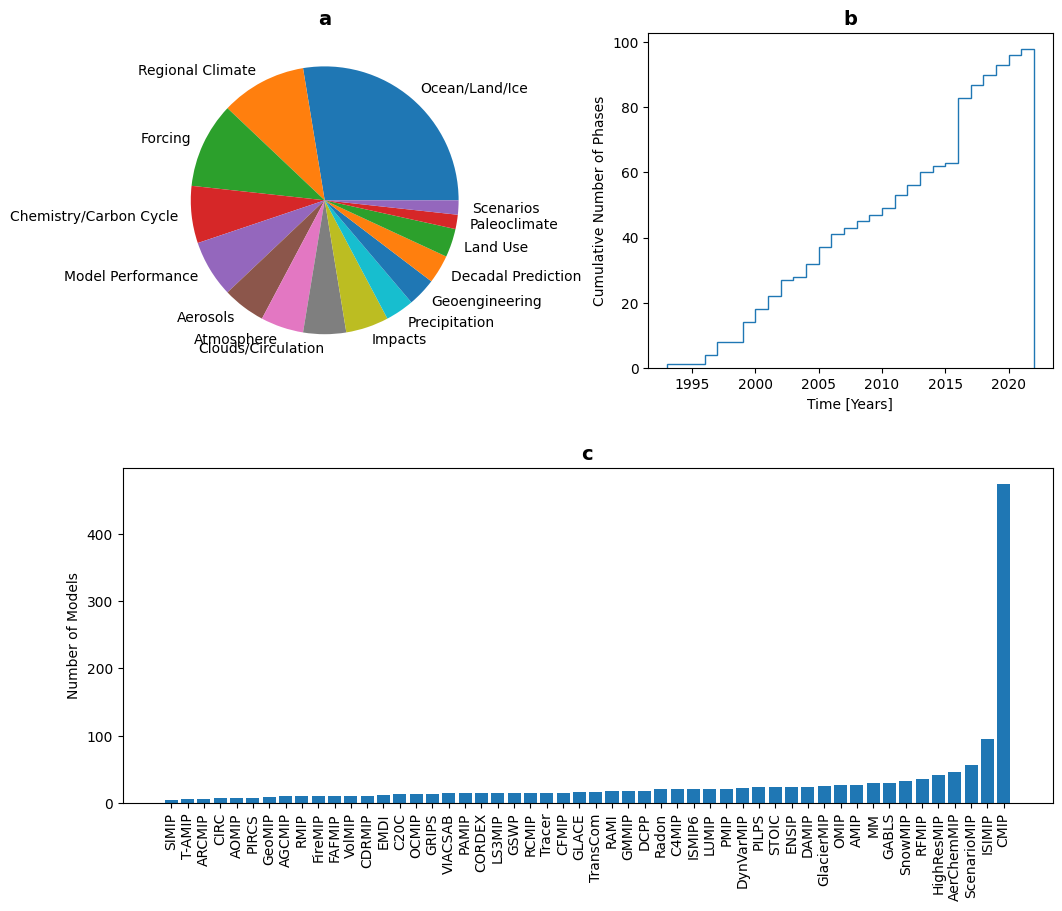

In [147]:
#statistics figure
#Layout
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

#font
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)

#plot1
piedf = df[['Abbrv.','Tag']].drop_duplicates()
total = piedf['Abbrv.'].value_counts().sum()
percentages = list(piedf['Tag'].value_counts()/total)
tags = piedf['Tag'].value_counts().index

ax1.set_title(r'$\bf{a}$')
ax1.pie(percentages, labels = tags)

#plot2
ax2.set_title(r'$\bf{b}$')
ax2.hist(df['Year (first published)'].dropna(), 29, cumulative = True, histtype = 'step')
ax2.set_xlabel('Time [Years]')
ax2.set_ylabel('Cumulative Number of Phases')
#ax2.tick_params(bottom=False, labelbottom=True)
#ax2.tick_params(axis = 'x', labelrotation = 45)

#plot3
ax3.set_title(r'$\bf{c}$')
ax3.bar(df.groupby('Abbrv.')['# embedded models'].max().dropna().sort_values(ascending = True).index, df.groupby('Abbrv.')['# embedded models'].max().dropna().sort_values(ascending = True))
plt.tick_params(axis = 'x', labelrotation = 90)
ax3.set_ylabel('Number of Models')


#plt.savefig('MIP_statistics.png', format = 'png')

In [ ]:
#impact figure
#Layout
fig = plt.figure(figsize=(12,10))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

#font
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)

#plot1
piedf = df[['Abbrv.','Tag']].drop_duplicates()
total = piedf['Abbrv.'].value_counts().sum()
percentages = list(piedf['Tag'].value_counts()/total)
tags = piedf['Tag'].value_counts().index

ax1.set_title(r'$\bf{a}$')
ax1.pie(percentages, labels = tags)

#plot2
ax2.set_title(r'$\bf{b}$')
ax2.hist(df['Year (first published)'].dropna(), 29, cumulative = True, histtype = 'step')
ax2.set_xlabel('Time [Years]')
ax2.set_ylabel('Cumulative Number of Phases')
#ax2.tick_params(bottom=False, labelbottom=True)
#ax2.tick_params(axis = 'x', labelrotation = 45)

#plot3
ax3.set_title(r'$\bf{c}$')
ax3.bar(df.groupby('Abbrv.')['# embedded models'].max().dropna().sort_values(ascending = True).index, df.groupby('Abbrv.')['# embedded models'].max().dropna().sort_values(ascending = True))
plt.tick_params(axis = 'x', labelrotation = 90)
ax3.set_ylabel('Number of Models')


#plt.savefig('MIP_statistics.pdf', format = 'pdf')